In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import numpy as np

2023-02-12 17:32:53.470483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 17:32:54.076775: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 17:32:54.076803: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-12 17:32:56.142924: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Obtendo os Dados

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
X_train.shape

(60000, 28, 28)

## Setando labels

In [5]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

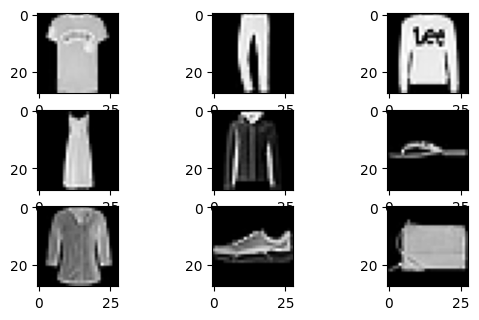

In [6]:
classes = set(y_test)

plt.figure(0)
for c in classes:  
  idx =  np.where(y_test == c) 
  if c + 1 == 10:
    break  
  plt.subplot(430 + 1 + c)
  plt.imshow(X_test[idx[0][0]], cmap=plt.get_cmap('gray'))

plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Separando em conjunto de teste e treino

In [10]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)
X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape)
print(X_test.shape)

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(y_train.shape)
print(y_test.shape)
print(num_classes)

(60000, 10)
(10000, 10)
10


## Construindo rede sequencial

In [12]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))

model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

2023-02-12 17:33:05.427733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-12 17:33:05.428123: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 17:33:05.428291: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-12 17:33:05.428353: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-12 17:33:05.428411: W tensorf

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Treinando a rede

In [14]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)

2023-02-12 17:33:07.475550: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/30
  11/1500 [..............................] - ETA: 27s - loss: 2.2493 - accuracy: 0.2841  

2023-02-12 17:33:13.180905: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 23193600 exceeds 10% of free system memory.
2023-02-12 17:33:13.181917: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 23193600 exceeds 10% of free system memory.
2023-02-12 17:33:13.185287: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25171200 exceeds 10% of free system memory.
2023-02-12 17:33:13.204473: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 23193600 exceeds 10% of free system memory.


1500/1500 [==============================] - 37s 22ms/step - loss: 0.5731 - accuracy: 0.7887 - val_loss: 0.4240 - val_accuracy: 0.8442
Epoch 2/30
1500/1500 [==============================] - 30s 20ms/step - loss: 0.3802 - accuracy: 0.8603 - val_loss: 0.3783 - val_accuracy: 0.8631
Epoch 3/30
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3317 - accuracy: 0.8777 - val_loss: 0.3235 - val_accuracy: 0.8817
Epoch 4/30
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3056 - accuracy: 0.8874 - val_loss: 0.2969 - val_accuracy: 0.8903
Epoch 5/30
1500/1500 [==============================] - 31s 20ms/step - loss: 0.2814 - accuracy: 0.8971 - val_loss: 0.3120 - val_accuracy: 0.8863
Epoch 6/30
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2648 - accuracy: 0.9021 - val_loss: 0.3004 - val_accuracy: 0.8888
Epoch 7/30
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2535 - accuracy: 0.9051 - val_loss: 0.2789 - val_accura

## Métricas de desempenho

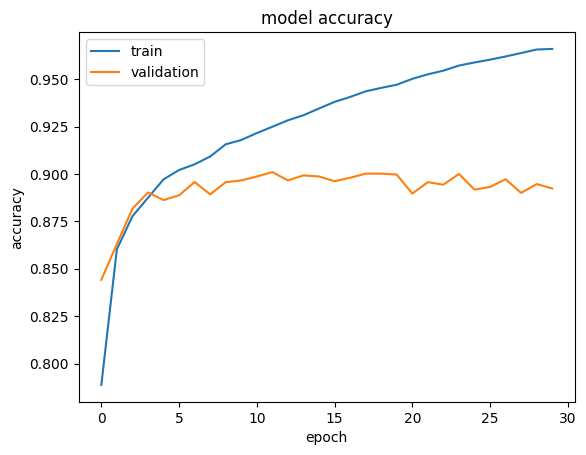

In [15]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 11.41%
Acurária da CNN: 88.59%


In [17]:
scores

[0.5124480724334717, 0.8859000205993652]